# Spotify song data

**Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?**

In [25]:
import math
import warnings

from IPython.display import display
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import neighbors
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Display preferences.
%matplotlib inline

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

# ipython markdown capabilities
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [26]:
df = pd.read_csv("Spotify_song_data.csv")
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [27]:
df.isnull().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

# KNN Regression

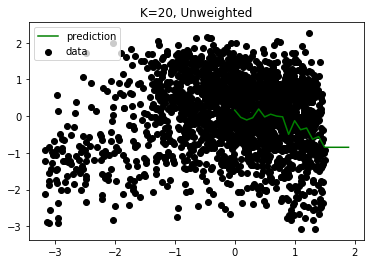

In [112]:
## Unweighted

knn = neighbors.KNeighborsRegressor(n_neighbors=20)
X = pd.DataFrame({'energy': stats.zscore(df['energy'])
})
Y = pd.DataFrame({'danceability': stats.zscore(df['danceability'])
})
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 2, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=20, Unweighted')
plt.show()

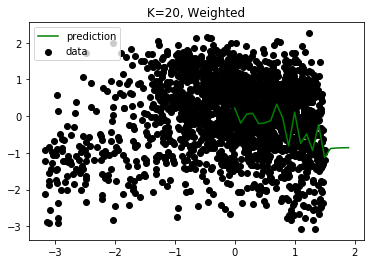

In [113]:
## Weighted

knn_w = neighbors.KNeighborsRegressor(n_neighbors=20, weights='distance')
X = pd.DataFrame({'energy': stats.zscore(df['energy'])
})
Y = pd.DataFrame({'danceability': stats.zscore(df['danceability'])
})
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 2, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=20, Weighted')
plt.show()

In [114]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.05 (+/- 0.08)
Weighted Accuracy: -0.47 (+/- 0.22)


Coefficients: 
 [[0.03855671]]
Intercept: 
 [4.23004069e-16]


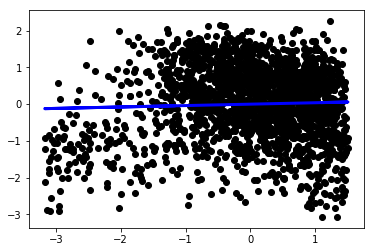

In [118]:
regr = linear_model.LinearRegression()

# Fit our model to our data.
X = pd.DataFrame({'energy': stats.zscore(df['energy'])
})
y = pd.DataFrame({'danceability': stats.zscore(df['danceability'])
})
regr.fit(X, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# Plot outputs
plt.scatter(X, y, color='black')
plt.plot(X, regr.predict(X), color='blue', linewidth=3)
plt.show()

**Compare the two. How similar are they? Do they miss in different ways?**

KNN is able to individualize each prediction whereas OLS assumes the relationship is valid for all values of x. The fact that weighted KNN appears to make a big difference in cross-validation would support the power of KNN in this case (albeit with increased variance). Neither model appears particularly strong in their simple iterations.

**Write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model.**

I would favor the weighted KNN model. I don't trust the simple assumption OLS has for prediction of all x values. I think that there has to be an obvious linear relationship between (normally distributed / no outliers) x and y values to trust OLS. If there is any potential for a non-linear relationship, I would sooner trust KNN. I would also obviously trust KNN for classification.

On the other hand, OLS can be very powerful with large sets of data. KNN here is calculating distances for each value - which would be a lot of heavy lifting in a more complex model. If I needed a powerful model and I were dealing with a large but somewhat simple set of data, I would use OLS. I would also use OLS if all other factors were the same, but I were concerned about KNN overfitting (e.g. a small k was required for model accuracy).